# Goal and Purpose

Linear regression is the simplest and arguably most well-known form of machine learning.

Linear regression models, as in statistics, are concerned with minimizing error and making the most accurate predictions possible. A neural network can accomplish this by iteratively updating its internal parameters (weights) via a gradient descent algorithm. The Youtube educator 3B1B has a [great visualization](https://www.youtube.com/watch?v=IHZwWFHWa-w) of gradient descent in the context of machine learning models.

In this notebook, I will develop a simple single-layer model to "learn" how to predict the outcome of a linear function of the form y=mx+b. This excersize may seem trivial or unecessary ("I can produce a list of solutions for a linear function and plot it with a few lines of code, why do I need a neural network to try and learn how to do the same thing?") but this will act as a backbone to build more complex neural networks for much **much** more complicated functions.

In [1]:
import numpy as np

## Simplest neural net
A neural network can be thought of as a function: input, transformation, and output. Therefore, in its most simple representation, a neural network can take a single input, produce an output, and by comparing that output with the known result, can update its internals to better approach the correct output value.

![simplest_NN.png](./fig/simplest_NN.png)

Here, x is some input number, the input is transformed via our neural network function which has parameters W and b (weight and bias). These parameters are subject to change based on how erroneous the network's output $\hat{y}$ is compared to the actual value we'd expect from input x.

The simple neural network has the following steps:
1. Initialize training input `x_train` and output `y_train`. The output here is the expected correct answer.
2. Initialize network parameters `W` and `b` . Here the weight array must correspond to the number of inputs. Since we only feed in one input at a time for now, the weights and bias arrays will have shape (1,1). The weight is initialized to a small random number.
3. Define our `cost` function. The "cost" can be thought of as the error between the expected output and our network's output. "Cost" and "Loss" are similar, though I believe the Loss function is the averaged error when considering a multitude of simultaneous inputs. We'll showcase this later, for now, each error calculation is refered to as the cost.
4. Calculate the components of the gradient of the `cost` function. In this case: $\frac{\delta W}{\delta C}$ and $\frac{\delta b}{\delta C}$.
5. Update the network parameters by reducing by a scaled amount of the gradient components. This is *gradient descent*. 
6. Repeat this process any number of times, called *epochs*. Return the parameters `W` and `b`. 
7. Use the model's updated parameters on *test data* to determine how accurate the trained model is.

In [2]:
# This is the function we want to have our neural network learn to model:
# y = 5x + 3
def F(x):
    f = 5.*x + 3.
    return f

# 1. initialize x_train, y_train
x_train=np.array([2.]).reshape(1,1)
y_train=F(x_train)

# 2. initialize network parameters
W = np.random.randn(1,1)*0.01
b = np.zeros(1).reshape(1,1)

# Setup an arbitrary function of the form that we are interested in
# This is also called the activation function of the neuron.
def P(W, b, x):
    f = np.dot(W.T,x) + b
    return f

# 3. Define cost function
def C(W,b,x,y):
    cost = (y-P(W,b,x))**2
    return cost

# 4,5,6. Gradient descent, update parameters, repeat
def model(W,b,x,y,epochs=5, learning_rate=0.05):
    for e in range(epochs):
        error=C(W,b,x,y)
        dw = 2.*(y-P(W,b,x))*(-1.0*x)
        db = -2.*(y-P(W,b,x))
        W -= dw*learning_rate
        b -= db*learning_rate
    return W,b
W,b = model(W,b,x_train,y_train,epochs=5,learning_rate=0.05)

# 7. Determine model's accuracy
x_test = np.array([5.])
y_test = F(x_test)

result = W*x_test + b
error = np.abs(result - y_test)/y_test*100
print("True equation:\ny = 5.0x + 3.0")
print("Our learned equation is:\ny = {:.2f}x + {:.2f}".format(np.mean(W),
                                                              np.mean(b)))
print("Testing for x =", x_test[0])
print("Model result, actual: {:.2f}, {:.1f}".format(np.mean(result), 
                                                    np.mean(y_test)))
print("Model error: {:.2f}%".format(error[0][0]))


True equation:
y = 5.0x + 3.0
Our learned equation is:
y = 5.04x + 2.52
Testing for x = 5.0
Model result, actual: 27.71, 28.0
Model error: 1.05%


In [3]:
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25]
x_test = np.array([10.])
y_test = F(x_test)

def get_error(W, b, x_train, y_train, epochs, lr, x_test, y_test):
    errors = []
    W = W.copy()
    b = b.copy()
    for e in epochs:
        W,b = model(W,b,x_train,y_train,epochs=e, learning_rate=lr)
        result = W*x_test + b
        error = np.abs(result - y_test)/y_test*100
        errors.append(error[0])
    return errors


error_lr_01 = get_error(W, b, x_train, y_train, epochs, 0.1, x_test, y_test)
error_lr_005 = get_error(W, b, x_train, y_train, epochs, 0.05, x_test, y_test)
error_lr_001 = get_error(W, b, x_train, y_train, epochs, 0.01, x_test, y_test)
error_lr_0005 = get_error(W, b, x_train, y_train, epochs, 0.005, x_test, y_test)
error_lr_0001 = get_error(W, b, x_train, y_train, epochs, 0.001, x_test, y_test)

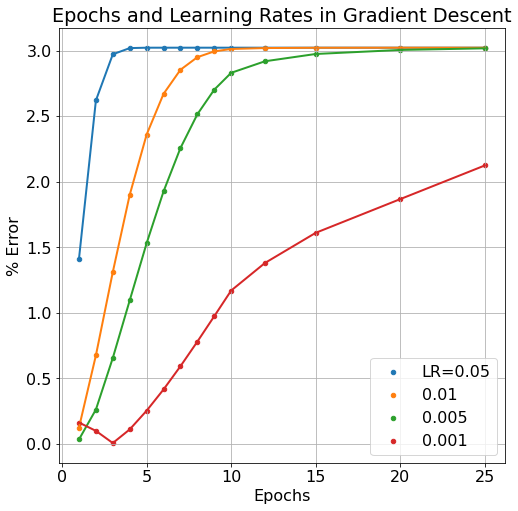

In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})


plt.figure(figsize=(8,8))
lw=2
s=20
#plt.plot(epochs, error_lr_01, lw=lw)
#plt.scatter(epochs, error_lr_01, s=s, label='LR=0.1')

plt.plot(epochs, error_lr_005, lw=lw)
plt.scatter(epochs, error_lr_005, s=s, label='LR=0.05')

plt.plot(epochs, error_lr_001, lw=lw)
plt.scatter(epochs, error_lr_001, s=s, label='0.01')

plt.plot(epochs, error_lr_0005, lw=lw)
plt.scatter(epochs, error_lr_0005, s=s, label='0.005')

plt.plot(epochs, error_lr_0001, lw=lw)
plt.scatter(epochs, error_lr_0001, s=s, label='0.001')

plt.xlabel('Epochs')
plt.ylabel('% Error')
plt.title('Epochs and Learning Rates in Gradient Descent')
plt.grid()
plt.legend()
plt.show()

## Multi-neuron inputs

A natural expansion of the "simplest neural net" is to provide more inputs to our neuron, thereby creating requiring more parameters to describe the network, increasing its sophistication and presumably increasing its peformance.
![vectorized_NN.png](./fig/vectorized_NN.png)

Let's train this expanded network to learn the same linear function from many inputs at the same time. The key here is to be able to perform the training process without having to loop over the array of inputs. We can accomplish this via numpy array vectorization.

In [5]:
# 1. initialize x_train, y_train
dim=5
x_train=np.arange(0,dim).reshape(1,dim)
y_train=F(x_train)

# 2. initialize network parameters
W = np.random.randn(1,x_train.shape[1])*0.01
b = np.zeros(x_train.shape[1]).reshape(1,x_train.shape[1])

# 4,5,6. Gradient descent, update parameters, repeat
def model(W,b,x,y,epochs=5, learning_rate=0.05):
    m = x.shape[1]
    for e in range(epochs):
        error=C(W,b,x,y)
        dw = np.sum(2.*(y-P(W,b,x))*(-1.0*x), axis=1, keepdims=True) / m
        db = np.sum(-2.*(y-P(W,b,x)), axis=1, keepdims=True) / m
        W -= dw.T*learning_rate
        b -= db.T*learning_rate
    return W,b
W,b = model(W,b,x_train,y_train,epochs=5,learning_rate=0.05)

# 7. Determine model's accuracy
#x_test = np.array([5., 10., 12., 13., 14.]).reshape(1,5)
x_test = np.array([5.]).reshape(1,1)
y_test = F(x_test)

result = W*x_test + b
error = np.abs(result - y_test)/y_test*100
with np.printoptions(precision=4, suppress=True):
    print("True equation:\ny = 5.0x + 3.0")
    print("Our learned equation is:\ny = {}x + {}".format(W[0],b[0]))
    print("Testing for x =", x_test[0])
    print("Model result, actual: {}, {}".format(result[0],y_test[0]))
    print("Model error: {}%".format(error[0]))

True equation:
y = 5.0x + 3.0
Our learned equation is:
y = [5.3122 5.3119 5.3119 5.3118 5.312 ]x + [2.0345 2.0431 2.0441 2.0467 2.0407]
Testing for x = [5.]
Model result, actual: [28.5956 28.6028 28.6037 28.6059 28.6008], [28.]
Model error: [2.127  2.153  2.1561 2.1639 2.1458]%


In [6]:
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25]
x_test = np.array([10.])
y_test = F(x_test)

def get_error(W, b, x_train, y_train, epochs, lr, x_test, y_test):
    errors = []
    W = W.copy()
    b = b.copy()
    for e in epochs:
        W,b = model(W,b,x_train,y_train,epochs=e, learning_rate=lr)
        result = W*x_test + b
        error = np.abs(result - y_test)/y_test*100
        errors.append(error[0])
    return errors


error_lr_01 = get_error(W, b, x_train, y_train, epochs, 0.1, x_test, y_test)
error_lr_005 = get_error(W, b, x_train, y_train, epochs, 0.05, x_test, y_test)
error_lr_001 = get_error(W, b, x_train, y_train, epochs, 0.01, x_test, y_test)
error_lr_0005 = get_error(W, b, x_train, y_train, epochs, 0.005, x_test, y_test)
error_lr_0001 = get_error(W, b, x_train, y_train, epochs, 0.001, x_test, y_test)

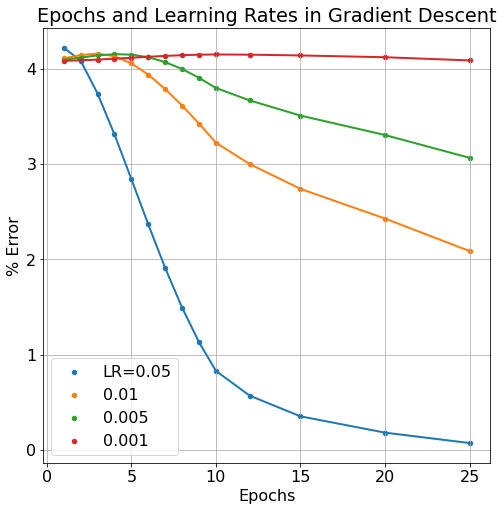

In [7]:
plt.figure(figsize=(8,8))
lw=2
s=20

plt.plot(epochs, np.mean(error_lr_005, axis=1), lw=lw)
plt.scatter(epochs, np.mean(error_lr_005, axis=1), s=s, label='LR=0.05')

plt.plot(epochs, np.mean(error_lr_001, axis=1), lw=lw)
plt.scatter(epochs, np.mean(error_lr_001, axis=1), s=s, label='0.01')

plt.plot(epochs, np.mean(error_lr_0005, axis=1), lw=lw)
plt.scatter(epochs, np.mean(error_lr_0005, axis=1), s=s, label='0.005')

plt.plot(epochs, np.mean(error_lr_0001, axis=1), lw=lw)
plt.scatter(epochs, np.mean(error_lr_0001, axis=1), s=s, label='0.001')

plt.xlabel('Epochs')
plt.ylabel('% Error')
plt.title('Epochs and Learning Rates in Gradient Descent')
plt.grid()
plt.legend()
plt.show()

# Multi-Layer Models
The next step will bring us to the "Deep" in Deep Learning. So far we've created only the simplest of models: input --> output, or multidimensional input --> output allowing for our model to quickly learn simple linear functions. But, by adding hidden layers to our model, we enable our model to learn much more complex functions. In fact, any function, and therefore even behaviors/tasks that cannot be easily described by a function in the first place (e.g. determine whether a collection of pixels is a cat or not, or safely navigate a car through a street.
![multilayer_NN.png](./fig/multilayer_NN.png)

Now our parameters `W` will be more numerous (they exist for each layer) and they also will have to be multidimensional matrices of the form (n,m) where n is the number of neurons in layer L and m is the number of neurons in layer L-1. The parameters `b` will still be assigned one to each layer, and will remain initialized as shape (n,1).

Remember that when you compute $W X + b$ in python, it carries out broadcasting. For example, if: 

$$ W = \begin{bmatrix}
    w_{00}  & w_{01} & w_{02} \\
    w_{10}  & w_{11} & w_{12} \\
    w_{20}  & w_{21} & w_{22} 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    x_{00}  & x_{01} & x_{02} \\
    x_{10}  & x_{11} & x_{12} \\
    x_{20}  & x_{21} & x_{22} 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    b_0  \\
    b_1  \\
    b_2
\end{bmatrix}\tag{1}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (w_{00}x_{00} + w_{01}x_{10} + w_{02}x_{20}) + b_0 & (w_{00}x_{01} + w_{01}x_{11} + w_{02}x_{21}) + b_0 & \cdots \\
    (w_{10}x_{00} + w_{11}x_{10} + w_{12}x_{20}) + b_1 & (w_{10}x_{01} + w_{11}x_{11} + w_{12}x_{21}) + b_1 & \cdots \\
    (w_{20}x_{00} + w_{21}x_{10} + w_{22}x_{20}) + b_2 &  (w_{20}x_{01} + w_{21}x_{11} + w_{22}x_{21}) + b_2 & \cdots
\end{bmatrix}\tag{2}  $$

To compute the cross-entropy cost $J$, I will use the following formula which is provided by Andrew Ng's Coursera course. It was chosen due to its concavity while also being easy to take the derivative of: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{3}$$


The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


$A^{[l-1] T}$ is the transpose of $A^{[l-1]}$. 

In [183]:
def init_parameters(layers_dims):
    parameters = {}
    L = len(layers_dims) # number of layers in network
    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*0.01
        parameters['b'+str(l)] = np.zeros((layers_dims[l],1))
    return parameters
def linear_activation_forward(A_prev, W, b, activation):
    Z = np.dot(W, A_prev)+b
    linear_cache = (A_prev, W, b)
    
    if activation == "sigmoid":
        A = 1./(1+np.exp(-1.0*Z))
        activation_cache = (Z)
    
    elif activation == "relu":
        A = np.maximum(0,Z)
        activation_cache = (Z)
    elif activation == "none":
        A = Z
        activation_cache = (Z)
        
    cache = (linear_cache, activation_cache)
    
    return A, cache
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    # Compute dZ = dA * g'(Z) where g'(Z) is the derivative of the activation function.
    if activation == "relu":
        # Derivative of ReLU
        if activation_cache.any() < 0:
            dZ = 0
        else:
            dZ = dA
    if activation == "sigmoid":
        # Derivative of sigmoid
        dZ = dA * (1./(1+np.exp(-1.0*activation_cache))) * (1 - (1./(1+np.exp(-1.0*activation_cache))))
    if activation =="none":
        dZ = dA
    
    # Get grads of this layer as well as dA for next layer in back prop
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

def compute_cost(m, AL, Y):
    # Simple cost
    print("AL, Y", AL, Y)
    cost = (Y - AL)**2
    #cost = (-1./m)*np.sum(np.multiply(Y,np.log(AL)) + np.multiply((1-Y), np.log(1-AL)))
    return cost

In [209]:
def L_layer_model(X, Y, layer_dims, learning_rate=0.05, num_iterations=10, print_cost=False):
    np.random.seed(2)
    costs = []
    # 0. Initialize parameters
    parameters = init_parameters(layer_dims)
    m = Y.shape[1] # used for cost calculation
    
    # 0a. Loop gradient descent
    for i in range(0, num_iterations):
        # 1. Forward Propogation.
        # Get activation of layer L and the cache of intermediate parameters and neuron values.
        caches = []
        A = X
        L = len(parameters) // 2
        for l in range(1,L):
            # Starting from 1 since layer 0 is the input layer.
            A_prev = A
            A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], 'none') #usually relu
            caches.append(cache)
        # Calling forward activation on last layer separately so we can use sigmoid activation function.
        AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], 'none')
        caches.append(cache)

        # 2. Compute Cost
        cost = compute_cost(m, AL, Y)
        cost = np.squeeze(cost) # squeezes out value from weird numpy array format (e.g turns [[17]] to 17).
        costs.append(cost)
        if (print_cost):
            print("Cost is {:.2f} on iteration {}".format(cost, i))
        
        # 3. Backward Propogation: get gradients
        grads = {}

        Y = Y.reshape(AL.shape) # Y and AL are now same shape

        dAL = -2.0*(Y-AL) # Derivative of Loss function with respect to final layer activation AL
        
        # Lth layer (Sigmoid --> Linear) gradients
        current_cache = caches[L-1]
        print(dAL, current_cache)
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, "none") # usually relu
        grads["dA" + str(L-1)] = dA_prev_temp
        grads["dW" + str(L)] = dW_temp
        grads["db"+str(L)] = db_temp
        print(grads)
        
        # Loop from l=L-2 to l=0
        for l in reversed(range(L-1)):
            current_cache = caches[l]
            dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)], current_cache, "none") #usually sigmoid
            grads["dA" + str(l)] = dA_prev_temp
            grads["dW" + str(l + 1)] = dW_temp
            grads["db" + str(l + 1)] = db_temp
            
        # Now have gradients in dictionary grads
        
        # 4. update parameters
        parameters = parameters.copy()
        for l in range(L):
            parameters["W" + str(l+1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
            parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters, costs
        

In [242]:
#dim = 1
#train_x = np.arange(0,dim).reshape(1,dim)
train_x = np.array([3]).reshape(1,1)
train_y = F(train_x)
layer_dims = [train_x.shape[0], 1, 1, 1]

params, costs = L_layer_model(train_x, train_y, layer_dims, learning_rate=0.05, num_iterations=20, print_cost=False)

AL, Y [[-1.502791e-07]] [[18.]]
[[-36.0000003]] ((array([[7.03489254e-06]]), array([[-0.02136196]]), array([[0.]])), array([[-1.502791e-07]]))
{'dA2': array([[0.7690306]]), 'dW3': array([[-0.00025326]]), 'db3': array([[-36.0000003]])}
AL, Y [[1.80082091]] [[18.]]
[[-32.39835819]] ((array([[-0.03845052]]), array([[-0.0213493]]), array([[1.80000002]])), array([[1.80082091]]))
{'dA2': array([[0.69168221]]), 'dW3': array([[1.24573383]]), 'db3': array([[-32.39835819]])}
AL, Y [[3.42602668]] [[18.]]
[[-29.14794663]] ((array([[-0.07303984]]), array([[-0.08363599]]), array([[3.41991792]])), array([[3.42602668]]))
{'dA2': array([[2.43781737]]), 'dW3': array([[2.1289615]]), 'db3': array([[-29.14794663]])}
AL, Y [[4.91437211]] [[18.]]
[[-26.17125579]] ((array([[-0.1949498]]), array([[-0.19008406]]), array([[4.87731526]])), array([[4.91437211]]))
{'dA2': array([[4.97473869]]), 'dW3': array([[5.102081]]), 'db3': array([[-26.17125579]])}
AL, Y [[6.38343005]] [[18.]]
[[-23.2331399]] ((array([[-0.4437

In [243]:
print(params)
print(costs)

{'W1': array([[-0.00031566]]), 'b1': array([[0.00128397]]), 'W2': array([[-9.38354033e-05]]), 'b2': array([[-2.94631222]]), 'W3': array([[-2.93440114]]), 'b3': array([[8.9453069]])}
[array(324.00000541), array(262.4134033), array(212.40069821), array(171.23365739), array(134.94469741), array(94.65065209), array(36.82072285), array(0.70268781), array(1.90618501), array(1.30799537), array(1.59059466), array(0.96829006), array(0.98709487), array(0.63640933), array(0.61437702), array(0.41861306), array(0.39257388), array(0.27832431), array(0.25493976), array(0.18621232)]
